In [197]:
import csv
import pandas as pd
import numpy as np
import string

from sklearn import model_selection, preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import matplotlib.pyplot as plt

df     = pd.read_csv('train-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])
dev_df = pd.read_csv('dev-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])

print(df.shape)
print(dev_df.shape)

df.head()

(103360, 3)
(37300, 3)


,id,location,text
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ..."
1,2,Melbourne,"@theage Of course it costs more, minimum stand..."
2,3,Brisbane,Hope people make just as much noise as they di...
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...
4,5,Perth,"$LNY losing traction at 0.014, see this retrac..."


In [198]:
# Get the training data
train_x, train_y = df['text'], df['location']

# Get the dev data
valid_x, valid_y = dev_df['text'], dev_df['location']

In [199]:
# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [200]:
# create a tf-idf vectorizer object 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['text'])

# transform the training and validation data using tf-idf vectorizer object
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [201]:
def train_model(classifier, train_x, train_y, valid_x, valid_y):
    # fit the training dataset on the classifier
    classifier.fit(train_x, train_y)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(valid_x)
    
    return metrics.accuracy_score(predictions, valid_y)

In [202]:
def find_metrics(classifier, train_x, train_y, valid_x, valid_y):
    classifier.fit(train_x, train_y)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(valid_x)
    
    accuracy = metrics.accuracy_score(predictions, valid_y)
    precision, recall, f_score, score = metrics.precision_recall_fscore_support(predictions, valid_y, average='weighted')
    
    return accuracy, precision, recall, f_score

In [168]:
# Finding the best hyperparameters (smoothing value) for plotting
accuracies1=[]
accuracies2=[]
accuracies3=[]

alphas=[]
for alpha in range(1,21):
    alpha /= 10.0
    accuracy1 = train_model(MultinomialNB(alpha=alpha), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
    accuracy2 = train_model(MultinomialNB(alpha=alpha), xtrain_count, train_y, xvalid_count, valid_y)
    accuracy3 = train_model(BernoulliNB(alpha=alpha), xtrain_count, train_y, xvalid_count, valid_y)
    accuracies1.append(accuracy1)
    accuracies2.append(accuracy2)
    accuracies3.append(accuracy3)
    alphas.append(alpha)

Text(0,0.5,'Accuracy')

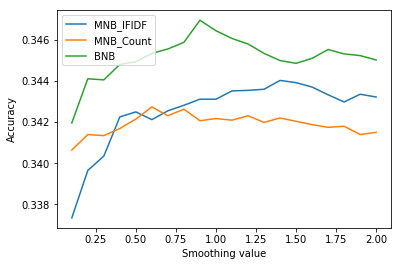

In [169]:
# Plot the accuracy vs smoothing values graph
plt.plot(alphas, accuracies1, label='MNB_IFIDF')
plt.plot(alphas, accuracies2, label='MNB_Count')
plt.plot(alphas, accuracies3, label='BNB')
plt.legend(loc='upper left')
plt.xlabel('Smoothing value')
plt.ylabel('Accuracy')

In [38]:
# Finding the best hyperparameters (smoothing value) for MNB on TF_IDF feature set
best_accuracy = 0
best_a = 0
for alpha in range(1,41):
    alpha /= 20.0
    accuracy = train_model(MultinomialNB(alpha=alpha), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
    print("Alpha: %f, Accuracy: %f" %(alpha, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_a = alpha

Alpha: 0.050000, Accuracy: 0.335013
Alpha: 0.100000, Accuracy: 0.337346
Alpha: 0.150000, Accuracy: 0.338391
Alpha: 0.200000, Accuracy: 0.339651
Alpha: 0.250000, Accuracy: 0.340214
Alpha: 0.300000, Accuracy: 0.340349
Alpha: 0.350000, Accuracy: 0.341287
Alpha: 0.400000, Accuracy: 0.342252
Alpha: 0.450000, Accuracy: 0.342413
Alpha: 0.500000, Accuracy: 0.342493
Alpha: 0.550000, Accuracy: 0.342011
Alpha: 0.600000, Accuracy: 0.342118
Alpha: 0.650000, Accuracy: 0.342011
Alpha: 0.700000, Accuracy: 0.342547
Alpha: 0.750000, Accuracy: 0.342306
Alpha: 0.800000, Accuracy: 0.342815
Alpha: 0.850000, Accuracy: 0.342949
Alpha: 0.900000, Accuracy: 0.343110
Alpha: 0.950000, Accuracy: 0.343029
Alpha: 1.000000, Accuracy: 0.343110
Alpha: 1.050000, Accuracy: 0.343512
Alpha: 1.100000, Accuracy: 0.343512
Alpha: 1.150000, Accuracy: 0.343673
Alpha: 1.200000, Accuracy: 0.343539
Alpha: 1.250000, Accuracy: 0.343539
Alpha: 1.300000, Accuracy: 0.343592
Alpha: 1.350000, Accuracy: 0.344102
Alpha: 1.400000, Accuracy: 0

In [40]:
print("Highest accuracy: ", best_accuracy)
print("Alpha: %f" %(best_a))

Highest accuracy:  0.3441018766756032
Alpha: 1.350000


In [17]:
# Finding the best hyperparameters (smoothing value) for MNB on Count_Vect feature set
best_accuracy = 0
best_a = 0
for alpha in range(1,41):
    alpha /= 20.0
    accuracy = train_model(MultinomialNB(alpha=alpha), xtrain_count, train_y, xvalid_count, valid_y)
    print("Alpha: %f, Accuracy: %f" %(alpha, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_a = alpha

Alpha: 0.050000, Accuracy: 0.338767
Alpha: 0.100000, Accuracy: 0.340643
Alpha: 0.150000, Accuracy: 0.340670
Alpha: 0.200000, Accuracy: 0.341394
Alpha: 0.250000, Accuracy: 0.341448
Alpha: 0.300000, Accuracy: 0.341340
Alpha: 0.350000, Accuracy: 0.341314
Alpha: 0.400000, Accuracy: 0.341689
Alpha: 0.450000, Accuracy: 0.341957
Alpha: 0.500000, Accuracy: 0.342145
Alpha: 0.550000, Accuracy: 0.342654
Alpha: 0.600000, Accuracy: 0.342735
Alpha: 0.650000, Accuracy: 0.342440
Alpha: 0.700000, Accuracy: 0.342306
Alpha: 0.750000, Accuracy: 0.342440
Alpha: 0.800000, Accuracy: 0.342627
Alpha: 0.850000, Accuracy: 0.342601
Alpha: 0.900000, Accuracy: 0.342064
Alpha: 0.950000, Accuracy: 0.342118
Alpha: 1.000000, Accuracy: 0.342172
Alpha: 1.050000, Accuracy: 0.342359
Alpha: 1.100000, Accuracy: 0.342091
Alpha: 1.150000, Accuracy: 0.342359
Alpha: 1.200000, Accuracy: 0.342306
Alpha: 1.250000, Accuracy: 0.341877
Alpha: 1.300000, Accuracy: 0.341984
Alpha: 1.350000, Accuracy: 0.341850
Alpha: 1.400000, Accuracy: 0

In [19]:
print("Highest accuracy: ", best_accuracy)
print("Alpha: %f" %(best_a))

Highest accuracy:  0.34273458445040217
Alpha: 0.600000


In [11]:
# Finding the best hyperparameters (smoothing value) for BNB on TF_IDF feature set
best_accuracy = 0
best_a = 0
for alpha in range(1,41):
    alpha /= 20.0
    accuracy = train_model(BernoulliNB(alpha=alpha), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
    print("Alpha: %f, Accuracy: %f" %(alpha, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_a = alpha

Alpha: 0.050000, Accuracy: 0.339383
Alpha: 0.100000, Accuracy: 0.341957
Alpha: 0.150000, Accuracy: 0.343566
Alpha: 0.200000, Accuracy: 0.344102
Alpha: 0.250000, Accuracy: 0.343914
Alpha: 0.300000, Accuracy: 0.344048
Alpha: 0.350000, Accuracy: 0.344236
Alpha: 0.400000, Accuracy: 0.344799
Alpha: 0.450000, Accuracy: 0.344477
Alpha: 0.500000, Accuracy: 0.344933
Alpha: 0.550000, Accuracy: 0.345040
Alpha: 0.600000, Accuracy: 0.345335
Alpha: 0.650000, Accuracy: 0.345389
Alpha: 0.700000, Accuracy: 0.345550
Alpha: 0.750000, Accuracy: 0.346059
Alpha: 0.800000, Accuracy: 0.345871
Alpha: 0.850000, Accuracy: 0.346005
Alpha: 0.900000, Accuracy: 0.346944
Alpha: 0.950000, Accuracy: 0.346542
Alpha: 1.000000, Accuracy: 0.346434
Alpha: 1.050000, Accuracy: 0.346434
Alpha: 1.100000, Accuracy: 0.346059
Alpha: 1.150000, Accuracy: 0.345791
Alpha: 1.200000, Accuracy: 0.345791
Alpha: 1.250000, Accuracy: 0.345684
Alpha: 1.300000, Accuracy: 0.345335
Alpha: 1.350000, Accuracy: 0.345416
Alpha: 1.400000, Accuracy: 0

In [14]:
print("Highest accuracy: ", best_accuracy)
print("Alpha: %f" %(best_a))

Highest accuracy:  0.3469436997319035
Alpha: 0.900000


In [15]:
# Finding the best hyperparameters (smoothing value) for BNB on Count_Vect feature set
best_accuracy = 0
best_a = 0
for alpha in range(1,41):
    alpha /= 20.0
    accuracy = train_model(BernoulliNB(alpha=alpha), xtrain_count, train_y, xvalid_count, valid_y)
    print("Alpha: %f, Accuracy: %f" %(alpha, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_a = alpha

Alpha: 0.050000, Accuracy: 0.339383
Alpha: 0.100000, Accuracy: 0.341957
Alpha: 0.150000, Accuracy: 0.343566
Alpha: 0.200000, Accuracy: 0.344102
Alpha: 0.250000, Accuracy: 0.343914
Alpha: 0.300000, Accuracy: 0.344048
Alpha: 0.350000, Accuracy: 0.344236
Alpha: 0.400000, Accuracy: 0.344799
Alpha: 0.450000, Accuracy: 0.344477
Alpha: 0.500000, Accuracy: 0.344933
Alpha: 0.550000, Accuracy: 0.345040
Alpha: 0.600000, Accuracy: 0.345335
Alpha: 0.650000, Accuracy: 0.345389
Alpha: 0.700000, Accuracy: 0.345550
Alpha: 0.750000, Accuracy: 0.346059
Alpha: 0.800000, Accuracy: 0.345871
Alpha: 0.850000, Accuracy: 0.346005
Alpha: 0.900000, Accuracy: 0.346944
Alpha: 0.950000, Accuracy: 0.346542
Alpha: 1.000000, Accuracy: 0.346434
Alpha: 1.050000, Accuracy: 0.346434
Alpha: 1.100000, Accuracy: 0.346059
Alpha: 1.150000, Accuracy: 0.345791
Alpha: 1.200000, Accuracy: 0.345791
Alpha: 1.250000, Accuracy: 0.345684
Alpha: 1.300000, Accuracy: 0.345335
Alpha: 1.350000, Accuracy: 0.345416
Alpha: 1.400000, Accuracy: 0

In [16]:
print("Highest accuracy: ", best_accuracy)
print("Alpha: %f" %(best_a))

Highest accuracy:  0.3469436997319035
Alpha: 0.900000


In [203]:
# Find the metrics for BNB on TF_IDF feature set with the best smoothing value
accuracy, precision, recall, f_score = find_metrics(BernoulliNB(alpha=0.9), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print(accuracy)
print(precision)
print(recall)
print(f_score)

0.3469436997319035
0.37249128425188166
0.3469436997319035
0.3514821256049599


In [204]:
# Find the metrics for BNB on Count_Vect feature set with the best smoothing value
accuracy, precision, recall, f_score = find_metrics(BernoulliNB(alpha=0.9), xtrain_count, train_y, xvalid_count, valid_y)
print(accuracy)
print(precision)
print(recall)
print(f_score)

0.3469436997319035
0.37249128425188166
0.3469436997319035
0.3514821256049599


In [205]:
# Find the metrics for MNB on TF_IDF feature set with the best smoothing value
accuracy, precision, recall, f_score = find_metrics(MultinomialNB(alpha=1.35), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print(accuracy)
print(precision)
print(recall)
print(f_score)

0.3441018766756032
0.35582512790871257
0.3441018766756032
0.34618619968412373


In [206]:
# Find the metrics for MNB on Count_Vect feature set with the best smoothing value
accuracy, precision, recall, f_score = find_metrics(MultinomialNB(alpha=0.6), xtrain_count, train_y, xvalid_count, valid_y)
print(accuracy)
print(precision)
print(recall)
print(f_score)

0.34273458445040217
0.4012077186717832
0.34273458445040217
0.3525338550487199


In [193]:
# Evaluate BNB on selectPercentile
BNBpercentiles = []
BNBaccuracies = []
for percentile in range(1,11):
    percentile *= 10
    selector = SelectPercentile(chi2, percentile=percentile)
    selector.fit(xtrain_tfidf, train_y)
    selected_xtrain = selector.transform(xtrain_tfidf)
    selected_xvalid = selector.transform(xvalid_tfidf)
    accuracy = train_model(BernoulliNB(alpha=0.9), selected_xtrain, train_y, selected_xvalid, valid_y)
    print("Percentile: %f, Accuracy: %f" %(percentile, accuracy))
    BNBpercentiles.append(percentile)
    BNBaccuracies.append(accuracy)
    

Percentile: 10.000000, Accuracy: 0.341582
Percentile: 20.000000, Accuracy: 0.347882
Percentile: 30.000000, Accuracy: 0.345737
Percentile: 40.000000, Accuracy: 0.344129
Percentile: 50.000000, Accuracy: 0.343914
Percentile: 60.000000, Accuracy: 0.343700
Percentile: 70.000000, Accuracy: 0.346193
Percentile: 80.000000, Accuracy: 0.346488
Percentile: 90.000000, Accuracy: 0.345871
Percentile: 100.000000, Accuracy: 0.346944


In [194]:
# Evaluate MNB TF_IDF on selectPercentile
MNB_T_percentiles = []
MNB_T_accuracies = []
for percentile in range(1,11):
    percentile *= 10
    selector = SelectPercentile(chi2, percentile=percentile)
    selector.fit(xtrain_tfidf, train_y)
    selected_xtrain = selector.transform(xtrain_tfidf)
    selected_xvalid = selector.transform(xvalid_tfidf)
    accuracy = train_model(MultinomialNB(alpha=1.35), selected_xtrain, train_y, selected_xvalid, valid_y)
    print("Percentile: %f, Accuracy: %f" %(percentile, accuracy))
    MNB_T_percentiles.append(percentile)
    MNB_T_accuracies.append(accuracy)
    

Percentile: 10.000000, Accuracy: 0.339357
Percentile: 20.000000, Accuracy: 0.343405
Percentile: 30.000000, Accuracy: 0.344397
Percentile: 40.000000, Accuracy: 0.343110
Percentile: 50.000000, Accuracy: 0.342708
Percentile: 60.000000, Accuracy: 0.342735
Percentile: 70.000000, Accuracy: 0.343780
Percentile: 80.000000, Accuracy: 0.343646
Percentile: 90.000000, Accuracy: 0.341716
Percentile: 100.000000, Accuracy: 0.344102


In [195]:
# Evaluate MNB Count_Vect on selectPercentile
MNB_C_percentiles = []
MNB_C_accuracies = []
for percentile in range(1,11):
    percentile *= 10
    selector = SelectPercentile(chi2, percentile=percentile)
    selector.fit(xtrain_count, train_y)
    selected_xtrain = selector.transform(xtrain_count)
    selected_xvalid = selector.transform(xvalid_count)
    accuracy = train_model(MultinomialNB(alpha=0.6), selected_xtrain, train_y, selected_xvalid, valid_y)
    print("Percentile: %f, Accuracy: %f" %(percentile, accuracy))
    MNB_C_percentiles.append(percentile)
    MNB_C_accuracies.append(accuracy)

Percentile: 10.000000, Accuracy: 0.339276
Percentile: 20.000000, Accuracy: 0.336032
Percentile: 30.000000, Accuracy: 0.335710
Percentile: 40.000000, Accuracy: 0.334182
Percentile: 50.000000, Accuracy: 0.333592
Percentile: 60.000000, Accuracy: 0.335147
Percentile: 70.000000, Accuracy: 0.335898
Percentile: 80.000000, Accuracy: 0.338874
Percentile: 90.000000, Accuracy: 0.341019
Percentile: 100.000000, Accuracy: 0.342735


Text(0,0.5,'Accuracy')

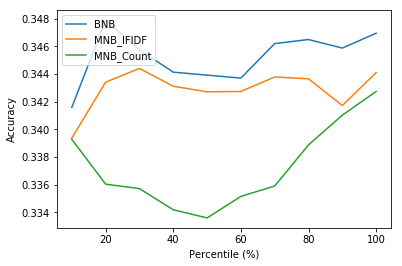

In [196]:
# Plot the accuracy vs percentile graph
plt.plot(BNBpercentiles, BNBaccuracies, label='BNB')
plt.plot(MNB_T_percentiles, MNB_T_accuracies, label='MNB_IFIDF')
plt.plot(MNB_C_percentiles, MNB_C_accuracies, label='MNB_Count')
plt.legend(loc='upper left')
plt.xlabel('Percentile (%)')
plt.ylabel('Accuracy')

In [84]:
# # For kaggle submission
# df     = pd.read_csv('train-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])
# dev_df = pd.read_csv('dev-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])

# train_x = df.text
# train_y = df.location

# train_x = train_x.append(dev_df.text, ignore_index=True)
# train_y = train_y.append(dev_df.location, ignore_index=True)

# # get test data
# data = []

# for line in open("test-raw.tsv"):
#     data.append(line.split("\t"))
    
# test_df = pd.DataFrame(data, columns = ['id', 'class', 'text'])
# test_x = test_df.text
# test_ids = test_df.id

# # create a tf-idf vectorizer object
# tfidf_vect = TfidfVectorizer()
# tfidf_vect.fit(train_x)
# xtrain_tfidf = tfidf_vect.transform(train_x)
# xtest_tfidf = tfidf_vect.transform(test_x)

# selector = SelectPercentile(f_classif, percentile=90)
# selector.fit(xtrain_tfidf, train_y)
# selected_xtrain = selector.transform(xtrain_tfidf)
# selected_xtest = selector.transform(xtest_tfidf)

# print(len(test_ids))
# print(selected_xtest.shape)

108148
(108148, 196896)


In [89]:
# # Writing out to csv for submission
# classifier = BernoulliNB(alpha=0.37) # Found the best test accuracy at 0.37 

# classifier.fit(selected_xtrain, train_y)
    
# # predict the labels on validation dataset
# y_pred = classifier.predict(selected_xtest)

# with open('predictions.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     writer.writerow(['Id', 'Class'])
#     for i in range(len(y_pred)):
#         lst = [test_ids[i], y_pred[i]]
#         writer.writerow(lst)

# print(len(y_pred))

108148


In [182]:
# Error Analysis
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_\']')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = re.sub('#[^\s]+', '', text) # remove hashtag (avoid overfitting)
#     text = re.sub('@[^\s]+', '', text) # remove username (avoid overfitting)
#     text = re.sub('http[^\s]+', '', text) # remove link reference
#     text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
#     text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
# Reload the dataset
df     = pd.read_csv('train-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])
dev_df = pd.read_csv('dev-raw.tsv', sep='\t', header=None, names=['id', 'location', 'text'])
df['text'] = df['text'].apply(clean_text)
dev_df['text'] = dev_df['text'].apply(clean_text)
df.head()

,id,location,text
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ..."
1,2,Melbourne,"@theage Of course it costs more, minimum stand..."
2,3,Brisbane,Hope people make just as much noise as they di...
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...
4,5,Perth,"$LNY losing traction at 0.014, see this retrac..."


In [184]:
# Get the training data
train_x, train_y = df['text'], df['location']

# Get the dev data
valid_x, valid_y = dev_df['text'], dev_df['location']

# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

# create a tf-idf vectorizer object 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['text'])

# transform the training and validation data using tf-idf vectorizer object
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [185]:
# Find the metrics score of the MNB Count_Vect after clean_text
accuracy, precision, recall, f_score = find_metrics(MultinomialNB(alpha=0.6), xtrain_count, train_y, xvalid_count, valid_y)
print("Accuracy %f, Precision %f, Recall %f, f_score %f" %(accuracy, precision, recall, f_score))

Accuracy 0.331823, Precision 0.392124, Recall 0.331823, f_score 0.342424


In [186]:
# Find the metrics score of the MNB TF_IDF after clean_text
accuracy, precision, recall, f_score = find_metrics(MultinomialNB(alpha=1.35), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print("Accuracy %f, Precision %f, Recall %f, f_score %f" %(accuracy, precision, recall, f_score))

Accuracy 0.331555, Precision 0.341595, Recall 0.331555, f_score 0.333391


In [187]:
# Find the metrics score of the BNB after clean_text
accuracy, precision, recall, f_score = find_metrics(BernoulliNB(alpha=0.9), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print("Accuracy %f, Precision %f, Recall %f, f_score %f" %(accuracy, precision, recall, f_score))

Accuracy 0.333700, Precision 0.360259, Recall 0.333700, f_score 0.338589
